In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

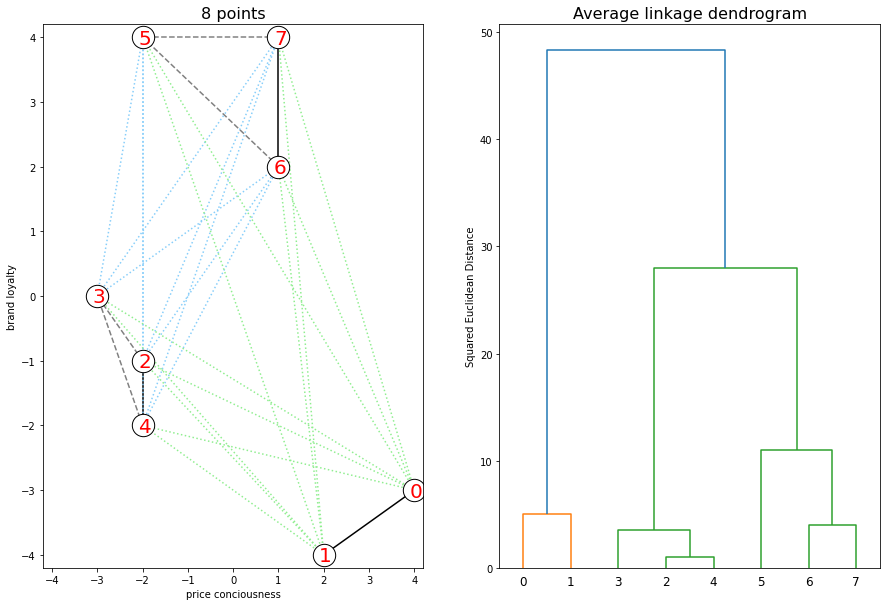

In [2]:
eight = np.array(([-3, -2, -2, -2, 1, 1, 2, 4], [0, 4, -1, -2, 4, 2, -4, -3])).T
eight = eight[[7,6,2,0,3,1,5,4], :]


d = np.zeros([8,8])

for i in range(0, 8):
    for j in range(0, 8):
        d[i, j] = np.linalg.norm(eight[i, :] - eight[j, :])

dd = (d**2)

ddd  = dd[1:, :-1][:, 0]
for i in range(1, 7):
    ddd = np.concatenate((ddd, dd[1:, :-1][i:, i]))

Z = hierarchy.linkage(ddd, 'average')


fig = plt.figure(figsize = (15, 10))

fig.add_subplot(1, 2, 1)
plt.xlim(-4.2, 4.2)
plt.ylim(-4.2, 4.2)
plt.title("8 points", fontsize = 16)
plt.ylabel("brand loyalty")
plt.xlabel("price conciousness")

# agglomarate first two nearest points
plt.plot([eight[4, 0], eight[2, 0]], [eight[4, 1], eight[2, 1]], c = "black", zorder = 0)
# add third point via average
plt.plot([eight[2, 0], eight[3, 0]], [eight[2, 1], eight[3, 1]], c = "grey", zorder = 0, linestyle = "--")
plt.plot([eight[4, 0], eight[3, 0]], [eight[4, 1], eight[3, 1]], c = "grey", zorder = 0, linestyle = "--")
# agglomerate second two nearest points
plt.plot([eight[6, 0], eight[7, 0]], [eight[6, 1], eight[7, 1]], c = "black", zorder = 0)
# agglomarate third two nearest points
plt.plot([eight[0, 0], eight[1, 0]], [eight[0, 1], eight[1, 1]], c = "black", zorder = 0)
# add point six to second subcluster via average
plt.plot([eight[7, 0], eight[5, 0]], [eight[7, 1], eight[5, 1]], c = "grey", zorder = 0, linestyle = "--")
plt.plot([eight[6, 0], eight[5, 0]], [eight[6, 1], eight[5, 1]], c = "grey", zorder = 0, linestyle = "--")

# compute subcluster between 345 and 678 via average
for i in range(2, 5):
    for j in range(5, 8):
        plt.plot([eight[i, 0], eight[j, 0]], [eight[i, 1], eight[j, 1]], 
                 c = "lightskyblue", zorder = 0, linestyle = "dotted")


# compute in case of merging of two last clusters:
for i in [0, 1]:
    for j in range(2, 8):
        plt.plot([eight[i, 0], eight[j, 0]], [eight[i, 1], eight[j, 1]], 
                 c = "lightgreen", zorder = 0, linestyle = "dotted")

plt.scatter(eight[:, 0], eight[:, 1], c = "w", edgecolors = "black", s = 500)
for i in range(0, 8):
    plt.text(eight[i, 0]-0.1, eight[i, 1]-0.1, str(i), fontsize = 20, color = "r")

fig.add_subplot(1, 2, 2)
h = hierarchy.dendrogram(Z)
plt.title("Average linkage dendrogram", fontsize = 16)
plt.ylabel("Squared Euclidean Distance")

plt.show()